In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import os
os.chdir('/hpcscratch/ieo/DIMA/scmultiome_mpi/')

In [2]:
sc.settings.verbosity = 3

# import data

In [3]:
#adata_path='/hpcnfs/scratch/DIMA/piva/mpi_freiburg/adata/adata_annotation.h5ad'
adata_path='/hpcnfs/scratch/DIMA/piva/mpi_freiburg/adata/adata_RNAassay_normalized.h5ad'
adata=sc.read_h5ad(adata_path)

In [10]:
adata

AnnData object with n_obs × n_vars = 22358 × 17807
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'pANN_0.25_0.09_556', 'doublets', 'dataset', 'pANN_0.25_0.09_978', 'pANN_0.25_0.09_143', 'pANN_0.25_0.09_477', 'pANN_0.25_0.09_359', 'pANN_0.25_0.09_20', 'pANN_0.25_0.09_136', 'pANN_0.25_0.09_70', 'pANN_0.25_0.09_1488', 'pANN_0.25_0.09_1159', 'pANN_0.25_0.09_399', 'pANN_0.25_0.09_832', 'sample', 'stage', 'replicate', 'nCount_ATAC', 'nFeature_ATAC', 'integrated_snn_res.0.8', 'ident', 'annotation_leiden12', 'group'
    var: 'FLYBASE'
    uns: 'X_name', 'log1p'
    obsm: 'X_umap'
    layers: 'logcounts'

In [5]:
markers=pd.read_csv('~/mpi_freiburg/code_for_figures/markergenes.csv')
markers_dict=markers[['gene','germlayer']].groupby('germlayer',  sort=False)['gene'].apply(list).to_dict()

# visualization

In [6]:
colori_samples={'Wild-type':"#00BA38", 'wt':"#00BA38",
                'E(z)-KD':"#619CFF","ez":"#619CFF", 
                'CBP-KD':"#F8766D","CBP":"#F8766D",'nej':"#F8766D"}

colori_germs= {"anterioposterior_ectoderm": '#002554',
                "mesoderm":'#FA4616',
                "dorsal_ectoderm" :'#5E8AB4',
                "ventral_ectoderm": '#B1C9E8',
                "anterior_endoderm":'#6CC24A',
                "posterior_endoderm": '#007041',
                "yolk" : '#EFDF00',
                "undifferentiated_cells" : '#68478D',
                "pluripotent_progenitors" :'#686E9F',
                "neuroectoderm":"#05C3DE"}

In [7]:
adata.obs['annotation_leiden12'].unique()

order_germ=[ 'mesoderm','anterioposterior_ectoderm', 'dorsal_ectoderm','neuroectoderm', 'ventral_ectoderm',  'anterior_endoderm', 'posterior_endoderm','yolk',
 'undifferentiated_cells',  'pluripotent_progenitors']
order_germ_wt=[ 'mesoderm','anterioposterior_ectoderm', 'dorsal_ectoderm','neuroectoderm', 'ventral_ectoderm',  'anterior_endoderm', 'posterior_endoderm','yolk', 'undifferentiated_cells']

In [8]:
markers['macro_germ']=[ ''.join(list(e.split('derm')[0])[-4:]) for e in markers['germlayer'] ]
markers

,gene,flybaseid,germlayer,macro_germ
0,GEFmeso,FBgn0050115,mesoderm,meso
1,Mes2,FBgn0037207,mesoderm,meso
2,NetA,FBgn0015773,mesoderm,meso
3,ltl,FBgn0268063,mesoderm,meso
4,sna,FBgn0003448,mesoderm,meso
5,stumps,FBgn0020299,mesoderm,meso
6,twi,FBgn0003900,mesoderm,meso
7,wgn,FBgn0030941,mesoderm,meso
8,zfh1,FBgn0004606,mesoderm,meso
9,Abd-B,FBgn0000015,anterioposterior_ectoderm,ecto


In [11]:
macro_germ_dict=markers[[ 'gene', #'flybaseid',
                         'macro_germ']].groupby('macro_germ',  sort=False)['gene' #'flybaseid'
                                                                          ].apply(list).to_dict()

In [12]:
scores=[]
for k, v in macro_germ_dict.items():
    sc.tl.score_genes(adata,gene_list=v, score_name='%s_score'%(k) )
    scores.append('%s_score'%(k))

computing score 'meso_score'
    finished: added
    'meso_score', score of gene set (adata.obs).
    200 total control genes are used. (0:00:00)
computing score 'ecto_score'
    finished: added
    'ecto_score', score of gene set (adata.obs).
    349 total control genes are used. (0:00:00)
computing score 'endo_score'
    finished: added
    'endo_score', score of gene set (adata.obs).
    350 total control genes are used. (0:00:00)
computing score 'yolk_score'
    finished: added
    'yolk_score', score of gene set (adata.obs).
    100 total control genes are used. (0:00:00)


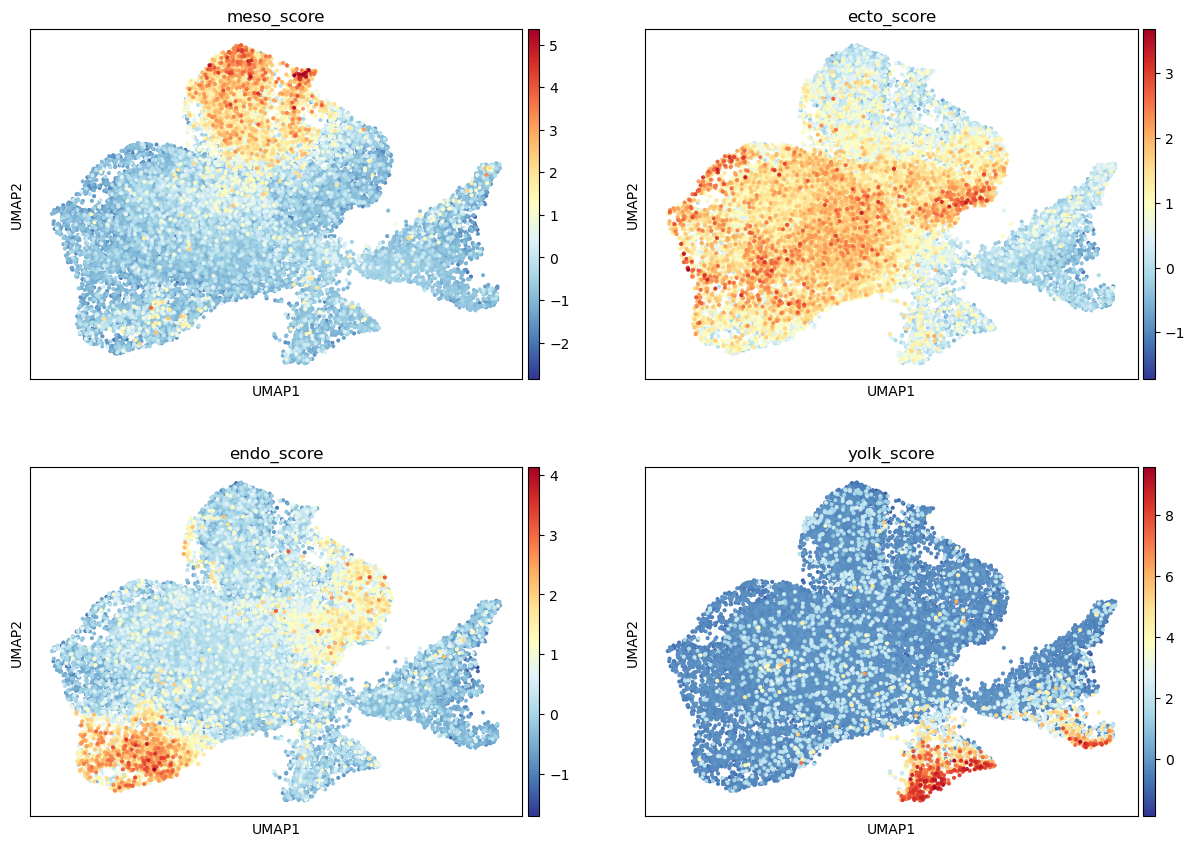

In [13]:
sc.pl.umap(adata, color=scores, cmap='RdYlBu_r', ncols=2, size=35)

In [27]:
def umap_samples(adata, genes, vmax=None, vmin=None):
    for gene in genes:
        try:
            fig, axs =plt.subplots(1, 3, #gridspec_kw={'width_ratios': [2,2,1]}, 
                                   figsize=(18,5 ))
            
            sc.pl.umap(adata[adata.obs['sample']=='wt'], color=gene, size=35, ax=axs[0], show=False ,cmap='RdYlBu_r', title='Wild-type - %s'%(gene), vmin=vmin, vmax= vmax) 
            sc.pl.umap(adata[adata.obs['sample']=='ez'], color=gene, size=35, ax=axs[1], show=False, cmap='RdYlBu_r', title='E(z)-KD - %s'%(gene), vmin=vmin, vmax=vmax)
            sc.pl.umap(adata[adata.obs['sample']=='nej'], color=gene, size=35,ax=axs[2], show=False, cmap='RdYlBu_r', title='CBP-KD - %s'%(gene), vmin=vmin, vmax= vmax)

            plt.savefig('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/figures/aprile24/umaps_germ_score/umap_sample_%s.pdf'%(gene))
    
        except:
            print('Error: ',gene,' not found')

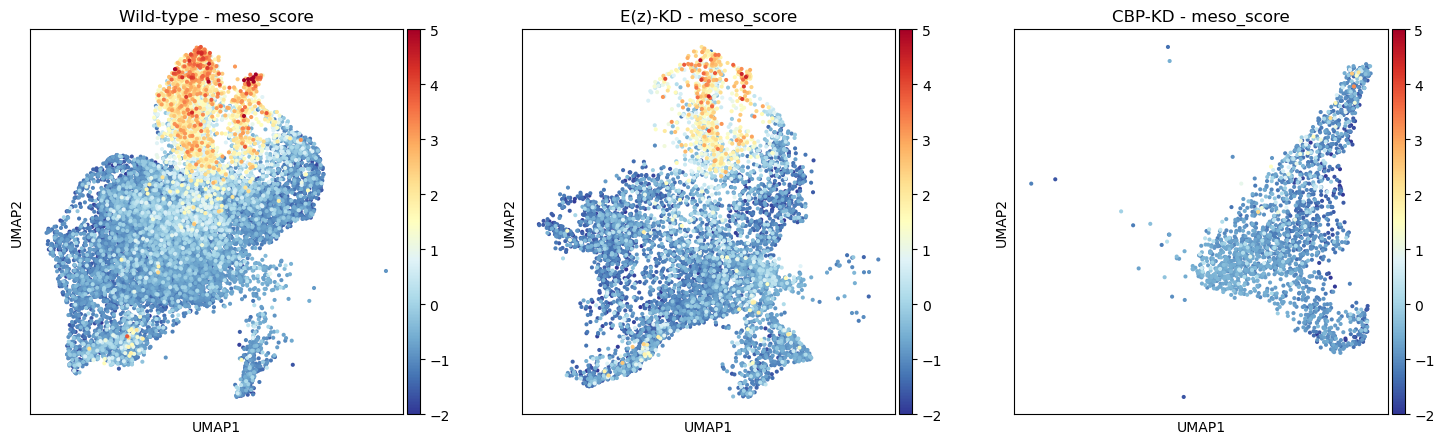

In [28]:
umap_samples(adata, genes=[scores[0]],vmax=5, vmin=-2)


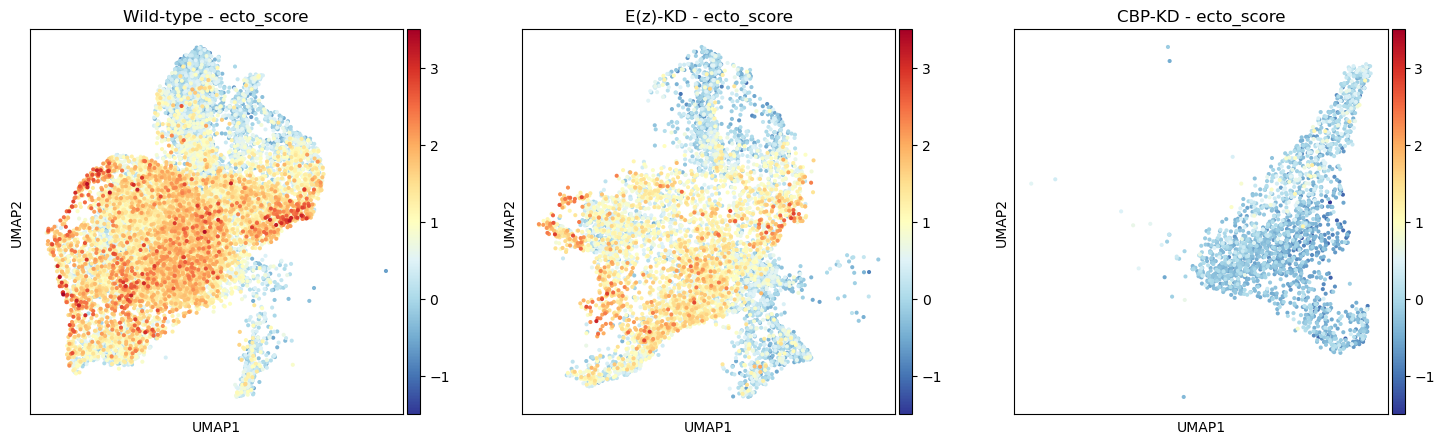

In [29]:
umap_samples(adata, genes=[scores[1]], vmax=3.5, vmin=-1.5 )

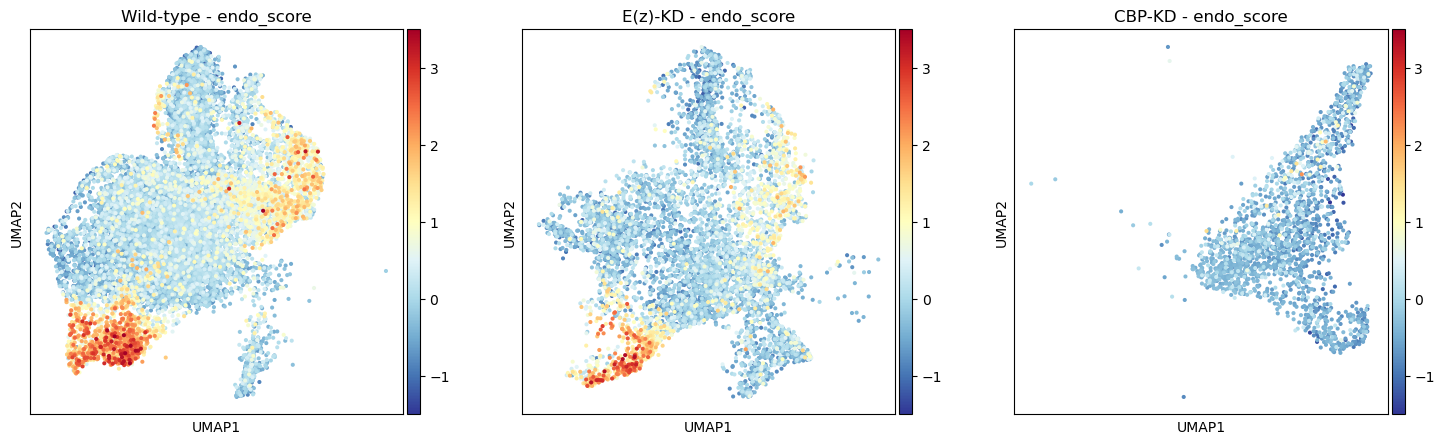

In [30]:
umap_samples(adata, genes=[scores[2]], vmax=3.5 , vmin=-1.5)